<a href="https://colab.research.google.com/github/Anirudh1905/Data_Analytics/blob/master/REG_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [11]:
tb1=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Reynolds (1).xlsx')
tb1

,SalesSold,MonthsEmployed
0,275,41
1,296,106
2,317,76
3,376,104
4,162,22
5,150,12
6,367,85
7,308,111
8,189,40
9,235,51


Text(0.5, 0, 'Months Employed')

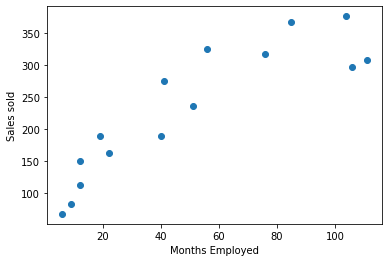

In [12]:
plt.scatter(tb1['MonthsEmployed'],tb1['SalesSold'])
plt.ylabel('Sales sold')
plt.xlabel('Months Employed')

In [13]:
x=tb1['MonthsEmployed']
y=tb1['SalesSold']
x2=sm.add_constant(x)
model=sm.OLS(y,x2).fit()
model.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalesSold   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     46.41
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           1.24e-05
Time:                        14:21:21   Log-Likelihood:                -78.745
No. Observations:                  15   AIC:                             161.5
Df Residuals:                      13   BIC:                             162.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            111.2279     21.628      5.143      0.000      64.503     157.952
MonthsEmployed     2.3768      0.349      6.812      0.000       1.623       3.131
==============================================================================
Omnibus:                        1.043   Durbin-Watson:                   2.261
Prob(Omnibus):                  0.594   Jarque-Bera (JB):                0.723
Skew:                           0.052   Prob(JB):                        0.697
Kurtosis:                       1.930   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
E=model.resid_pearson
E

array([ 1.33945744, -1.35645713,  0.50765989,  0.35518943, -0.03063607,
        0.20702037,  1.08543558, -1.35411191, -0.34936157,  0.05163116,
       -1.00208207, -0.56041143, -1.18121025,  1.62923113,  0.65864542])

In [15]:
yhat=model.predict()
yhat

array([208.67569258, 363.16606097, 291.86281402, 358.41251117,
       163.51696952, 139.74922053, 313.2537881 , 375.04993546,
       206.29891768, 232.44344156, 132.61889584, 139.74922053,
       125.48857114, 244.32731606, 156.38664482])

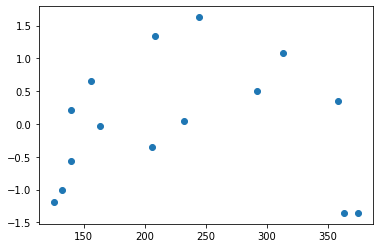

In [16]:
plt.scatter(yhat,E)

In [17]:
x_sq=(x**2)
x_sq

0      1681
1     11236
2      5776
3     10816
4       484
5       144
6      7225
7     12321
8      1600
9      2601
10       81
11      144
12       36
13     3136
14      361
Name: MonthsEmployed, dtype: int64

In [20]:
x_new=np.column_stack((x,x_sq))
x_new1=sm.add_constant(x_new)
model1=sm.OLS(y,x_new1).fit()
model1.summary()

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalesSold   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     55.36
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           8.75e-07
Time:                        14:24:55   Log-Likelihood:                -72.704
No. Observations:                  15   AIC:                             151.4
Df Residuals:                      12   BIC:                             153.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.3476     22.775      1.991      0.070      -4.274      94.969
x1             6.3448      1.058      5.998      0.000       4.040       8.650
x2            -0.0345      0.009     -3.854      0.002      -0.054      -0.015
==============================================================================
Omnibus:                        2.162   Durbin-Watson:                   1.313
Prob(Omnibus):                  0.339   Jarque-Bera (JB):                1.003
Skew:                          -0.126   Prob(JB):                        0.606
Kurtosis:                       1.758   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
E1=model1.resid_pearson
E1

array([ 0.797777  , -0.99895952, -0.32984543,  1.27097898, -0.18118441,
        0.97178443,  0.91436152, -0.48542046, -1.59531168, -1.28395183,
       -0.48348828, -0.13117488, -0.44045635,  0.94303218,  1.03185873])

In [23]:
yhat1=model1.predict()
yhat1

array([247.5143749 , 330.41691942, 328.36408757, 332.21125762,
       168.24230429, 116.51933758, 335.49771571, 324.72407789,
       243.96290147, 279.23569304,  99.65750913, 116.51933758,
        82.17493987, 292.50993204, 153.44961189])

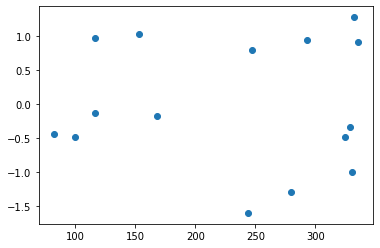

In [24]:
plt.scatter(yhat1,E1)